In [224]:
from sklearn import datasets, model_selection, linear_model, neural_network, preprocessing, model_selection

import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob, os


In [229]:
# First we load the data
#print((mnist.images[0]))
#mnist = datasets.load_digits()
#X,y = mnist.images,mnist.target
#X = X.reshape(len(X),-1)

images=[]#np.zeros(2628)
X=[]#np.zeros(2628)
y=[]
numTiles=12


for i,file in enumerate(glob.glob("rot-tiles/*.jpg")):
    split=file.split("_")
    #print(split)
    #print(i)
    #z = cv2.imread(file, cv2.IMREAD_GRAYSCALE),file.split("_")[1]
    #images.append(z) #file, tile number, rotation
    #y.append(file.split("_")[1])
    #print(file.split("_")[-1].split(".")[0])
    #if(split[-2]!='noshift'):
    #    continue
        
    images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE)) #file, tile number, rotation
    '''
    if(split[-2]=='DEC' and int(split[-1].split(".")[0])<5):
        y.append(int(split[1]))
    elif(split[-2]=='DEC' and int(split[-1].split(".")[0])>=5):
        y.append(int(split[1])+1)
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])<5):
        y.append(int(split[1]))
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])>=5):
        y.append(int(split[1])+numTiles)
    else:
        y.append(int(split[0]))
    ''' 
    y.append(int(split[0].split("/")[1]))

#print(images[1][0][0])
#print(images[0])

#X = images[0][:]
#y= images[1][:]
print(images[0])
X = np.asarray(images).reshape(len(images),-1)
#X=np.reshape(X,(2628,1))
print(X[0])
#for i in X:
#    print(np.shape(i))

#plt.imshow(X[0])



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 ... 0 0 0]


This tile is 67


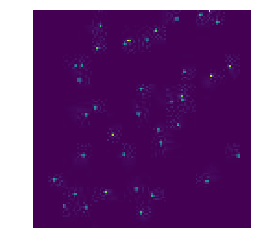

This tile is 125


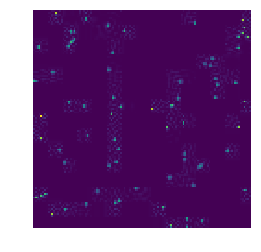

This tile is 37


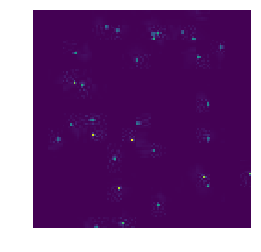

This tile is 129


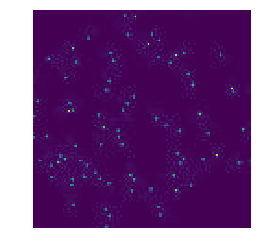

This tile is 84


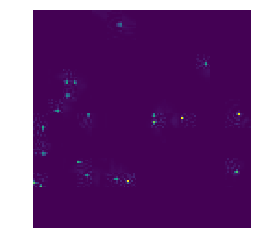

In [230]:
# Let's see what the data looks like
for idx in range(5):
    #print(idx)
    print("This tile is "+repr(y[idx]))
    plt.imshow(images[idx])
    plt.axis('off')
    plt.show()

In [231]:
scalar = preprocessing.MinMaxScaler()
scalar.fit(X)
X_normalized=scalar.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size=0.33, random_state=42)


In [232]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

predictions = clf.predict(X_test)

perc=0

for i in range(len(predictions)):
    #print(predictions[i], y_test[i])
    if y_test[i]==predictions[i]:
        perc+=1

print("Test scored: "+repr(perc/float(len(predictions))))
proba=clf.predict_proba(X_test)
print(proba)

Test scored: 0.4616576297443842
[[0.01659713 0.00650564 0.00629975 ... 0.00212683 0.00801511 0.01271915]
 [0.0192822  0.01228152 0.00756765 ... 0.00337587 0.00527028 0.02432861]
 [0.01516707 0.00796356 0.0041467  ... 0.00226981 0.0056358  0.01755016]
 ...
 [0.03489227 0.00893038 0.01058882 ... 0.00278019 0.00767115 0.0158482 ]
 [0.00378249 0.01097375 0.0026265  ... 0.0048226  0.00301747 0.00663351]
 [0.00103659 0.00327208 0.00953288 ... 0.00244329 0.00543401 0.00194048]]


In [234]:
proba.shape

(2582, 144)

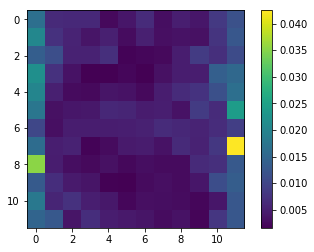

(2, 11)
5.0


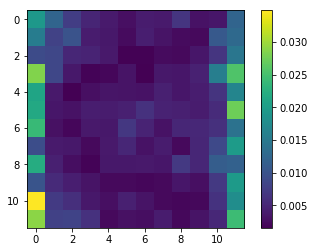

(9, 11)
11.045361017187261


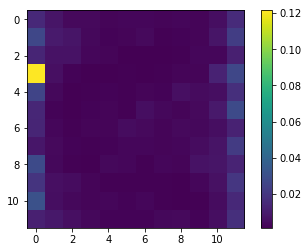

(3, 0)
0.0


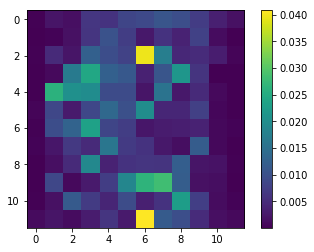

(2, 7)
9.055385138137417


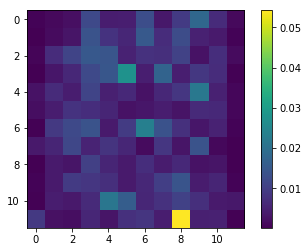

(11, 8)
0.0


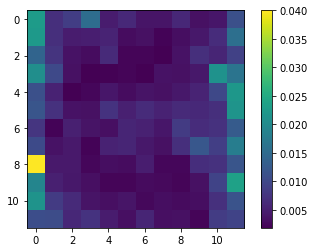

(2, 11)
12.529964086141668


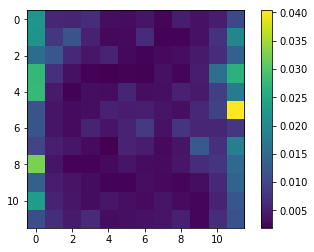

(10, 0)
12.083045973594572


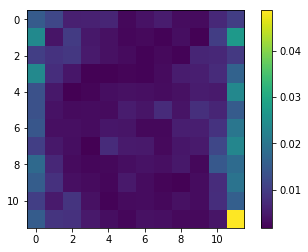

(11, 11)
0.0


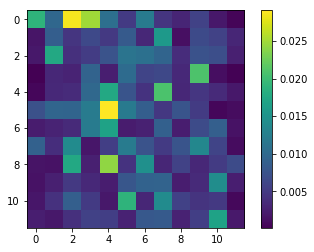

(5, 5)
1.0


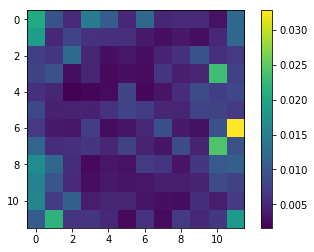

(7, 10)
1.4142135623730951


In [254]:
#print(proba[0])
for idx in range(10):
    plt.imshow(np.reshape(proba[idx], (12,12)))
    plt.colorbar()
    plt.show()
    print(y_test[idx]/12, y_test[idx]%12)#Actual coordinates of where tile is from
    print(np.sqrt((y_test[idx]/12 - predictions[idx]/12)**2.0 + (y_test[idx]%12 - predictions[idx]%12)**2.00 ))
    #print(max(proba[idx])/12, max(proba[idx])%12)
    #plt.imshow(np.reshape(y_test[idx], (12,12)))

0.508907823393


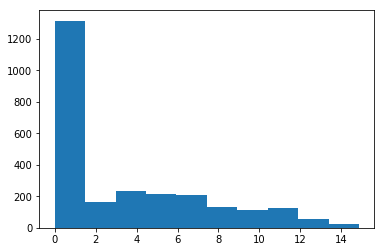

In [257]:
dist=[]
for idx in range(len(y_test)):
    #print(y_test[idx]/12, y_test[idx]%12)#Actual coordinates of where tile is from
    dist.append(np.sqrt((y_test[idx]/12 - predictions[idx]/12)**2.0 + (y_test[idx]%12 - predictions[idx]%12)**2.00))
    #print(max(proba[idx])/12, max(proba[idx])%12)
    #plt.imshow(np.reshape(y_test[idx], (12,12)))

plt.hist(dist)
sum1=0
for d in dist:
    if d<2.0:
        sum1+=1
        
print(sum1/float(len(y_test)))